In [121]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import gumbel_r

#notes for learning about Rust (1987) model 
#outlining the model + specification here

#Set up 
# Three possible states: 0,1,2
beta = 0.9
def utility(x, d):
    if d == 0: #not replace, cost increases
        return -x #maintenance cost increases with mileage 
    elif d == 1: #replaced the bus - zero mileage
        return -5 #fixed RC 

def next_value(x,d):
    if d == 1: #if replaced
        return 0 #reset mileage
    elif d == 0: 
        return min(x+1,2)


In [122]:
#starting with all value equals 0 
V = np.zeros(3)

def iterate(value): #no return - change in-place the value function
    reference = value.copy()
    for i in range(3):
        state = i
        v1 = np.exp(utility(state,0) + beta*reference[next_value(state,0)])
        v0 = np.exp(utility(state,1) + beta*reference[next_value(state,1)])
        value[i] = np.log(v1 + v0)

tolerance = []
first = []
second = []
third = []

#iterating procedure 
for i in range(100):
    first.append(V[0])
    second.append(V[1])
    third.append(V[2])
    temp = V.copy()
    iterate(V)
    distance = sum(abs(V - temp))
    tolerance.append(distance)


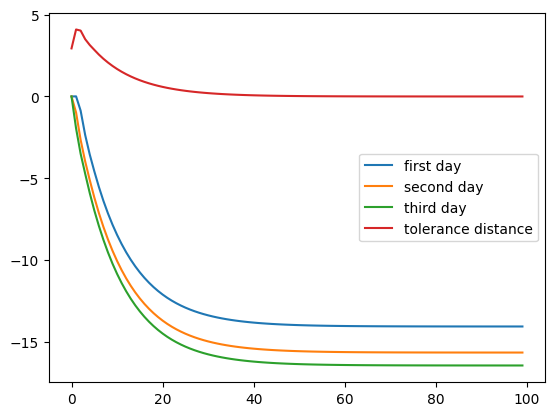

In [123]:
#graphing out the movement of the values to show that it converges 
x = np.arange(100)  # Time axis from 0 to 99

plt.plot(x,first, label='first day')
plt.plot(x,second, label='second day')
plt.plot(x,third, label='third day')
plt.plot(x,tolerance, label='tolerance distance')
plt.legend()
plt.show()

#this shows that the value function actually converges 

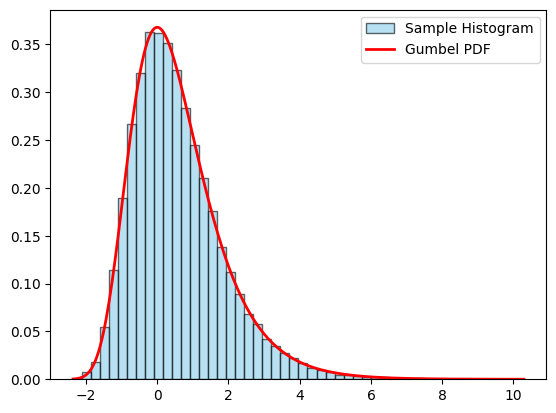

In [130]:
# just some playing with Extreme Value Type I Distribution here 
sample = np.random.gumbel(loc=0, scale= 1, size=50000)
plt.hist(sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample Histogram')

# Overlay the true Gumbel PDF
x = np.linspace(min(sample), max(sample), 300)
pdf = gumbel_r.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, 'r-', lw=2, label='Gumbel PDF')

plt.legend()
plt.show()